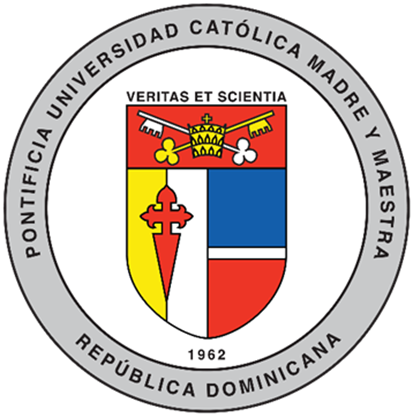

# **Proyecto Final**
## Grupo 9 Integrantes: **Edwin Balbuena (1014-9910) Daniel Almonte (1014-9898) Ronny Severivo (1014-4700)**
## Materia: **Inteligencia de Negocios**
## Facilitadora: **Lisibonny Beato**
## Fecha de entrega: **27/11/2024**





# Introducci√≥n al Notebook - Construcci√≥n del Modelo de Miner√≠a de Datos Descriptivo

## Objetivo del Notebook

*Este notebook tiene como prop√≥sito abordar la segunda tarea del Proyecto Final de Inteligencia de Negocios (ICC-321-T). La tarea consiste en la Construcci√≥n de un Modelo de Miner√≠a de Datos Descriptivo para analizar y extraer informaci√≥n oculta de las m√©tricas del canal de YouTube The Quiz Challenge. Este modelo busca identificar patrones y caracter√≠sticas que influyen en el √©xito de los videos para proporcionar estrategias efectivas que incrementen tanto las vistas como los suscriptores.*

## Contexto del Problema
*El canal de YouTube The Quiz Challenge enfrenta los siguientes desaf√≠os clave:*

1.  Desempe√±o inconsistente de los videos: Algunos videos obtienen muchas vistas, pero no se comprende por qu√©.
2.  Conversi√≥n ineficaz de vistas a suscriptores: No hay una relaci√≥n directa entre vistas altas y un aumento de suscriptores.
3.  Falta de decisiones basadas en datos: Actualmente, las decisiones sobre el contenido se toman por intuici√≥n o eventos temporales.


**üí° El canal necesita una estrategia basada en datos para decidir qu√© tipos, tem√°ticas y caracter√≠sticas audiovisuales optimizar.**

##**Incognitas claves a responder**

*   ¬øQu√© caracter√≠sticas tienen los videos m√°s exitosos?

*   ¬øQu√© tem√°ticas o tipos de contenido deben priorizarse para maximizar vistas y suscriptores?
*   ¬øC√≥mo mejorar el impacto de las caracter√≠sticas audiovisuales (audio, miniaturas, duraci√≥n)?



---


# Metodolog√≠a

*Para responder estas preguntas, se aplicar√° un modelo de Clustering que agrupa los videos en categor√≠as basadas en similitudes en sus caracter√≠sticas. Esto permitir√° identificar patrones que no son evidentes de manera directa.*

#**Pasos principales:**

*   üîé Exploraci√≥n y preparaci√≥n de datos:  Integrar m√∫ltiples fuentes de datos del canal (vistas, suscriptores, calidad de audio, an√°lisis de miniaturas). Transformar y limpiar datos para garantizar su calidad y consistencia.

*   ‚öôÔ∏è Construcci√≥n del modelo de clustering: Seleccionar las m√©tricas clave (e.g., vistas, suscriptores, tasas de clics, calidad de audio). Normalizar los datos y aplicar el algoritmo K-Means. Determinar el n√∫mero √≥ptimo de clusters con el M√©todo del Codo.

*   üìä Visualizaci√≥n y an√°lisis de resultados: Generar gr√°ficos que expliquen las relaciones entre m√©tricas y clusters (mapas de calor, gr√°ficos de dispersi√≥n). Identificar patrones clave en cada grupo.

*   ‚úÖ Conclusiones y recomendaciones: Proporcionar estrategias basadas en datos para mejorar el engagement y el crecimiento del canal.


---


#**Objetivo del Proyecto**
El objetivo es proveer un modelo descriptivo que ayude a The Quiz Challenge a:

1.  Determinar qu√© caracter√≠sticas optimizar en sus videos.

2.  Identificar tem√°ticas y estilos de contenido con mayor potencial de √©xito.

3.  Tomar decisiones informadas basadas en datos para maximizar el impacto en vistas y suscriptores.



---


#**üìå Nota: Este notebook est√° dise√±ado para ejecutarse en Google Colab y est√° completamente documentado para facilitar su comprensi√≥n y uso por tercero**

# **1. Importar librer√≠as**

In [ ]:
#Importar librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

*En esta secci√≥n del c√≥digo se importan las bibliotecas necesarias para el an√°lisis y modelado de datos. pandas y numpy se utilizan para manejar y realizar c√°lculos sobre los datos, mientras que matplotlib y seaborn permiten crear visualizaciones para explorar y comunicar los resultados. Adem√°s, se importan herramientas de scikit-learn como StandardScaler, para normalizar los datos, y KMeans, que se emplea para realizar el clustering y descubrir patrones dentro del dataset. Estas librer√≠as forman la base del an√°lisis y preparaci√≥n de los datos para este proyecto.*

# **2. Montar Drive con los datos**

In [ ]:
#Montar el drive para trabajo en equipo
from google.colab import drive

drive.mount('/content/drive')

try:
  df = pd.read_csv('/content/drive/MyDrive/PROYECTO FINAL INT NEGOCIOS/Contenido.csv')
  print(df)
except FileNotFoundError:
  print("Error: File not found. Please check the file path.")
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")




*En esta secci√≥n, se monta Google Drive en el entorno de Google Colab mediante drive.mount para acceder y trabajar con archivos almacenados en el Drive compartido del equipo. Se utiliza un bloque try-except para cargar un archivo CSV espec√≠fico, en este caso, Contenido.csv, utilizando pandas.*

## **3. Resumen de Datos**


In [ ]:
ruta_base = '/content/drive/MyDrive/PROYECTO FINAL INT NEGOCIOS/'


archivos = {
    "Contenido": "Contenido.csv",
    "Audio Quality": "Audio Quality.csv",
    "Image Analysis": "image_analysis.csv",
    "Area Geografica": "Area Geografica.csv",
    "Edad": "Edad.csv",
    "Estado de Suscripci√≥n": "Estado de Supscricion.csv",
    "Fecha": "Fecha.csv",
    "Fuente": "Fuente.csv",
    "Origen Subs": "OrigenSubs.csv",
    "Pantalla Final": "PantallaFinal.csv",
    "Sexo": "Sexo.csv",
    "Tipo de Contenido": "TipoContenido.csv"
}

# Diccionario para almacenar los DataFrames

datos = {}

# Cargar los datos con manejo de errores
for nombre, archivo in archivos.items():
    try:
        datos[nombre] = pd.read_csv(ruta_base + archivo)
        print(f"\nDatos de '{nombre}' cargados exitosamente.")
    except FileNotFoundError:
        print(f"Error: Archivo '{archivo}' no encontrado.")
    except pd.errors.ParserError:
        print(f"Error: Problema al analizar '{archivo}'. Verifica el formato.")
    except Exception as e:
        print(f"Un error inesperado ocurri√≥ al cargar '{archivo}': {e}")






Datos de 'Contenido' cargados exitosamente.

Datos de 'Audio Quality' cargados exitosamente.

Datos de 'Image Analysis' cargados exitosamente.

Datos de 'Area Geografica' cargados exitosamente.

Datos de 'Edad' cargados exitosamente.

Datos de 'Estado de Suscripci√≥n' cargados exitosamente.

Datos de 'Fecha' cargados exitosamente.

Datos de 'Fuente' cargados exitosamente.

Datos de 'Origen Subs' cargados exitosamente.

Datos de 'Pantalla Final' cargados exitosamente.

Datos de 'Sexo' cargados exitosamente.

Datos de 'Tipo de Contenido' cargados exitosamente.


In [ ]:
# Mostrar solo las primeras 5 filas de cada dataset
for nombre, df in datos.items():
    print(f"\nPrimeros 5 datos del dataset '{nombre}':")
    print(df.head())
    print("-" * 80)


Primeros 5 datos del dataset 'Contenido':
                          T√≠tulo del video Tiempo de publicaci√≥n del video  \
0        Animal Quiz for Kids | Facts Quiz                       5/22/2024   
1  Capitals of the World Quiz | Facts Quiz                       5/22/2024   
2         Flags Quiz for Kids | Facts Quiz                        6/5/2024   
3          African Flags Quiz | Facts Quiz                       6/11/2024   
4               Olympics Quiz | Facts Quiz                       6/21/2024   

   Vistas  Tiempo de reproducci√≥n (horas)  Suscriptores  \
0   145.0                          2.3205           8.0   
1   101.0                          1.1407           0.0   
2   153.0                          2.5069           2.0   
3   114.0                          0.8850           1.0   
4  6961.0                         91.8560          30.0   

  Duraci√≥n promedio de vistas  Impresiones  \
0                     0:00:57        777.0   
1                     0:00:40        

# **4. Gr√°ficos Explorat√≥rios**

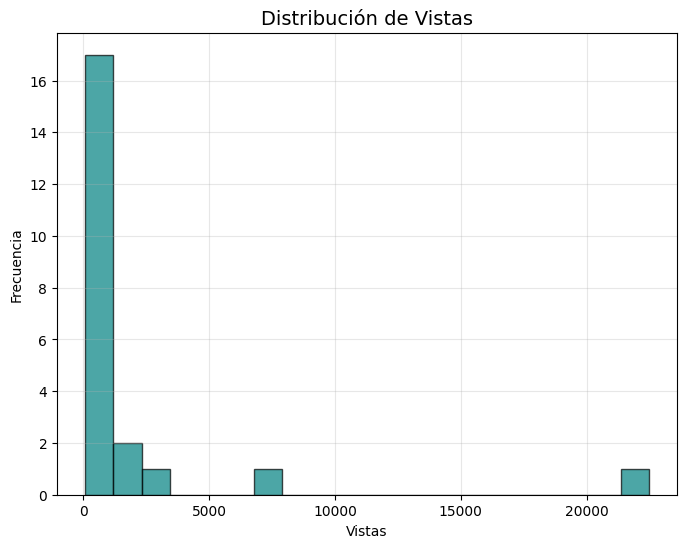

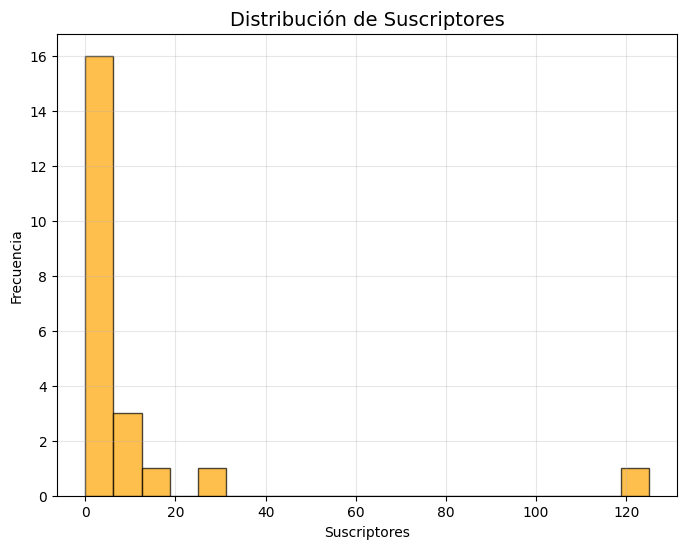

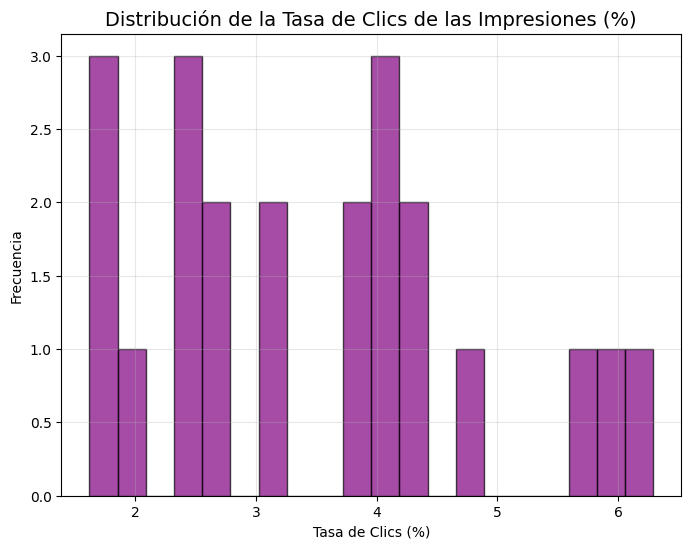

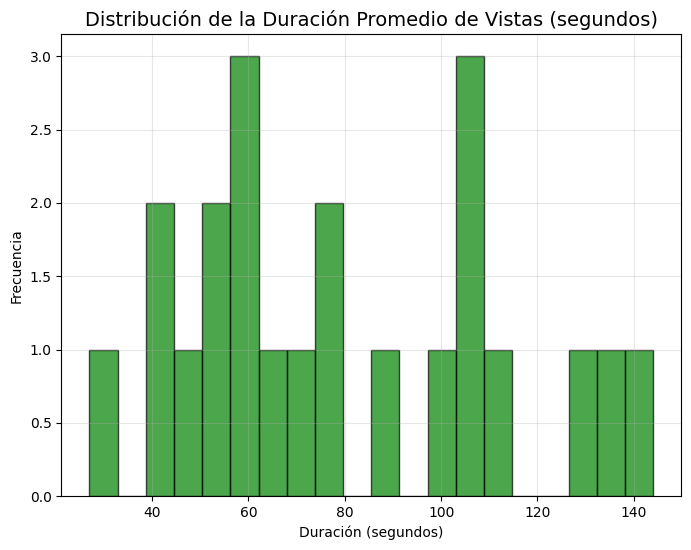

In [ ]:
contenido = pd.read_csv(ruta_base + 'Contenido.csv')


# Histograma de Vistas
plt.figure(figsize=(8, 6))
plt.hist(contenido['Vistas'], bins=20, edgecolor='black', alpha=0.7, color='teal')
plt.title('Distribuci√≥n de Vistas', fontsize=14)
plt.xlabel('Vistas')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Histograma de Suscriptores
plt.figure(figsize=(8, 6))
plt.hist(contenido['Suscriptores'], bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribuci√≥n de Suscriptores', fontsize=14)
plt.xlabel('Suscriptores')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Histograma de Tasa de Clics de las Impresiones (%)
plt.figure(figsize=(8, 6))
plt.hist(contenido['Tasa de clics de las impresiones (%)'], bins=20, edgecolor='black', alpha=0.7, color='purple')
plt.title('Distribuci√≥n de la Tasa de Clics de las Impresiones (%)', fontsize=14)
plt.xlabel('Tasa de Clics (%)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Histograma de Duraci√≥n Promedio de Vistas
contenido['Duraci√≥n promedio de vistas (seg)'] = pd.to_timedelta(contenido['Duraci√≥n promedio de vistas'], errors='coerce').dt.total_seconds()
plt.figure(figsize=(8, 6))
plt.hist(contenido['Duraci√≥n promedio de vistas (seg)'], bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Distribuci√≥n de la Duraci√≥n Promedio de Vistas (segundos)', fontsize=14)
plt.xlabel('Duraci√≥n (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()


# **5. Gr√°ficos de Dispersi√≥n**

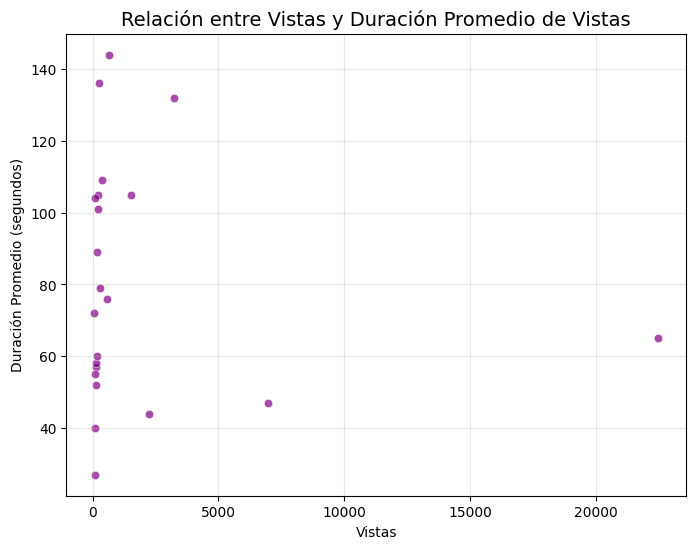

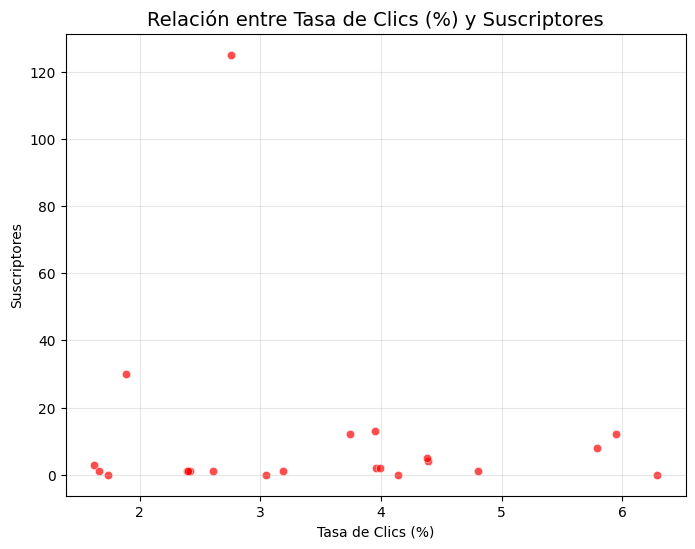

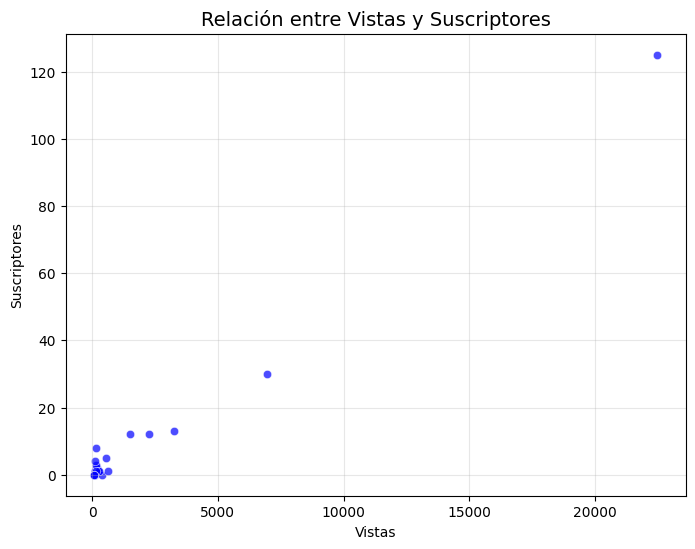

In [ ]:
# Gr√°fico de Dispersi√≥n: Vistas vs. Duraci√≥n Promedio de Vistas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=contenido, x='Vistas', y='Duraci√≥n promedio de vistas (seg)', alpha=0.7, color='purple')
plt.title('Relaci√≥n entre Vistas y Duraci√≥n Promedio de Vistas', fontsize=14)
plt.xlabel('Vistas')
plt.ylabel('Duraci√≥n Promedio (segundos)')
plt.grid(True, alpha=0.3)
plt.show()

# Gr√°fico de Dispersi√≥n: Tasa de Clics vs. Suscriptores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=contenido, x='Tasa de clics de las impresiones (%)', y='Suscriptores', alpha=0.7, color='red')
plt.title('Relaci√≥n entre Tasa de Clics (%) y Suscriptores', fontsize=14)
plt.xlabel('Tasa de Clics (%)')
plt.ylabel('Suscriptores')
plt.grid(True, alpha=0.3)
plt.show()

# Gr√°fico de Dispersi√≥n: Vistas vs. Suscriptores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=contenido, x='Vistas', y='Suscriptores', alpha=0.7, color='blue')
plt.title('Relaci√≥n entre Vistas y Suscriptores', fontsize=14)
plt.xlabel('Vistas')
plt.ylabel('Suscriptores')
plt.grid(True, alpha=0.3)
plt.show()


## **6. Seleccionar y Preparar Datos para Clustering**



In [ ]:
# Cargar tablas relevantes
contenido = pd.read_csv(ruta_base + 'Contenido.csv')
audio_quality = pd.read_csv(ruta_base + 'Audio Quality.csv')
image_analysis = pd.read_csv(ruta_base + 'image_analysis.csv')

# Procesar los datos
# Extraer solo los valores num√©ricos de los niveles de audio en decibeles (dB)
audio_quality['Volumen de Audio (dB)'] = audio_quality['Volumne de Audio'].str.extract(r'([-+]?[0-9]*\.?[0-9]+)').astype(float)

# Mantener solo las columnas relevantes del an√°lisis de im√°genes
image_analysis = image_analysis.rename(columns={'Image Name': 'T√≠tulo del video'})
image_analysis = image_analysis[['T√≠tulo del video', 'Main Confidence', 'Average Confidence', 'Number of Labels']]

# Unir datos de contenido con Volumen de Audio y An√°lisis de Im√°genes
contenido = contenido.merge(audio_quality[['T√≠tulo del video', 'Volumen de Audio (dB)']], on="T√≠tulo del video", how="left")
contenido = contenido.merge(image_analysis, on="T√≠tulo del video", how="left")

# Manejar valores faltantes con NaN
contenido = contenido.where(pd.notnull(contenido), None)

print("\nCargados y unificados todos los datos relevantes.")


Cargados y unificados todos los datos relevantes.


*Este bloque de c√≥digo carga y procesa datos de tres fuentes: informaci√≥n general de videos (Contenido.csv), niveles de audio (Audio Quality.csv), y an√°lisis de miniaturas (image_analysis.csv). Extrae valores num√©ricos de volumen en decibeles, selecciona columnas clave de las miniaturas (confianza, promedio y etiquetas), y combina todos los datos en un √∫nico dataset usando el t√≠tulo del video como clave.*

In [ ]:
# Seleccionar m√©tricas relevantes para el clustering
columnas_clustering = ["Vistas", "Suscriptores", "Tasa de clics de las impresiones (%)",
                        "Duraci√≥n promedio de vistas", "Volumen de Audio (dB)",
                        "Main Confidence", "Average Confidence", "Number of Labels"]

# Filtrar columnas disponibles en la tabla
columnas_usadas = [col for col in columnas_clustering if col in contenido.columns]
clustering_data = contenido[columnas_usadas].copy()

print("\nColumnas utilizadas para el clustering:")
print(columnas_usadas)

# Convertir columnas de tiempo a segundos
if "Duraci√≥n promedio de vistas" in clustering_data.columns:
    clustering_data["Duraci√≥n promedio de vistas"] = pd.to_timedelta(
        clustering_data["Duraci√≥n promedio de vistas"], errors='coerce'
    ).dt.total_seconds()

# Normalizar los datos
clustering_data = clustering_data.fillna(0)  # Rellenar NaN temporalmente para normalizaci√≥n
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

print("\nDatos seleccionados y normalizados.")


Columnas utilizadas para el clustering:
['Vistas', 'Suscriptores', 'Tasa de clics de las impresiones (%)', 'Duraci√≥n promedio de vistas', 'Volumen de Audio (dB)', 'Main Confidence', 'Average Confidence', 'Number of Labels']

Datos seleccionados y normalizados.


 *Se seleccionan m√©tricas clave del dataset, como vistas, suscriptores, tasa de clics, duraci√≥n promedio de vistas y caracter√≠sticas de las miniaturas, para el an√°lisis de clustering. Se filtran las columnas disponibles, convirtiendo la duraci√≥n promedio a segundos para facilitar su uso en c√°lculos. Los valores faltantes se rellenan temporalmente con ceros y los datos se normalizan utilizando StandardScaler para garantizar que todas las m√©tricas est√©n en la misma escala, preparando el conjunto de datos para la aplicaci√≥n de algoritmos de clustering.*

## **7. Clustering y Determinaci√≥n del N√∫mero √ìptimo de Clusters**


Determinamos el n√∫mero √≥ptimo de clusters para nuestro an√°lisis utilizando el M√©todo del Codo. Calculamos la inercia para diferentes valores de k (n√∫mero de clusters) y graficamos los resultados. Esto nos permite identificar el punto donde agregar m√°s clusters no mejora significativamente la agrupaci√≥n, ayud√°ndonos a elegir el n√∫mero adecuado de clusters para nuestro an√°lisis.

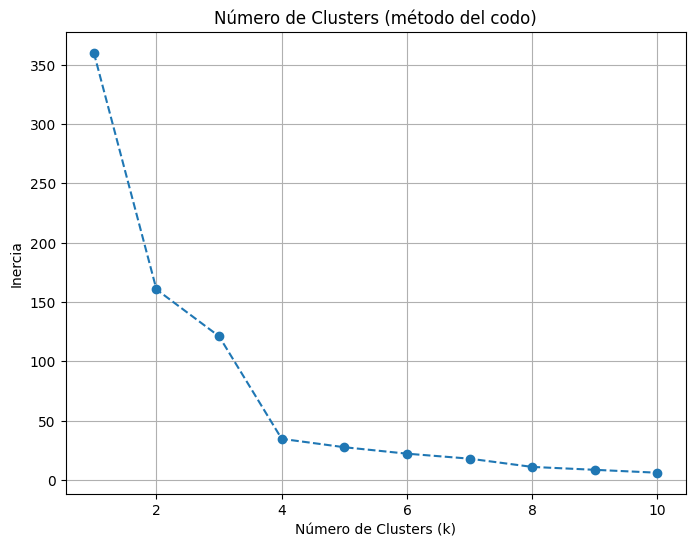

In [ ]:
# Determinar el n√∫mero √≥ptimo de clusters (M√©todo del Codo)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Graficar el m√©todo del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('N√∫mero de Clusters (m√©todo del codo)')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

El gr√°fico que muestra el m√©todo del codo para determinar el n√∫mero √≥ptimo de cl√∫steres indica que, a medida que aumenta el n√∫mero de cl√∫steres, la variaci√≥n dentro del cl√∫ster (representada en el eje Y) disminuye. Sin embargo, se observa que, despu√©s de un n√∫mero espec√≠fico de cl√∫steres, la disminuci√≥n en la variaci√≥n interna se vuelve m√°s gradual, formando un "codo" en el gr√°fico. Este "codo" se encuentra t√≠picamente en el punto donde el rendimiento mejora de manera marginal con la adici√≥n de m√°s cl√∫steres, lo que sugiere que el n√∫mero √≥ptimo de cl√∫steres es aquel en el que se produce este cambio en la pendiente. En este caso, el n√∫mero de cl√∫steres √≥ptimo parece ser 3, ya que despu√©s de este punto, la mejora en la varianza es poco significativa.

# **8. Aplicaci√≥n del Clustering**

In [ ]:
# Aplicar K-Means Clustering
# Elegir n√∫mero de clusters seg√∫n el codo
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# A√±adir los clusters a los datos originales
clustering_data['Cluster'] = clusters
contenido['Cluster'] = clusters

# Resumen del clustering
cluster_summary = clustering_data.groupby('Cluster').mean()
print("\nResumen de Clusters (Promedios):")
print(cluster_summary)


Resumen de Clusters (Promedios):
             Vistas  Suscriptores  Tasa de clics de las impresiones (%)  \
Cluster                                                                   
0        893.133333      5.333333                              3.942667   
1        936.500000      5.208333                              0.115000   
2        729.500000      3.000000                              2.535000   

         Duraci√≥n promedio de vistas  Volumen de Audio (dB)  Main Confidence  \
Cluster                                                                        
0                          68.066667               1.374000         0.884078   
1                           2.708333               0.000000         0.000000   
2                         111.833333              -3.676667         0.909005   

         Average Confidence  Number of Labels  
Cluster                                        
0                  0.740749              10.0  
1                  0.000000               0.

Aplica el algoritmo de K-Means Clustering al conjunto de datos normalizados, utilizando 3 clusters seg√∫n lo determinado previamente por el m√©todo del codo. Los clusters asignados se a√±aden tanto al conjunto de datos normalizado como al original (clustering_data y contenido). Luego, se calcula un resumen de las m√©tricas promedio para cada cluster, lo que proporciona una visi√≥n general de las caracter√≠sticas principales que diferencian cada grupo, facilitando la interpretaci√≥n y an√°lisis de los resultados del clustering.

# **9. Visualizaci√≥n de Resultados**

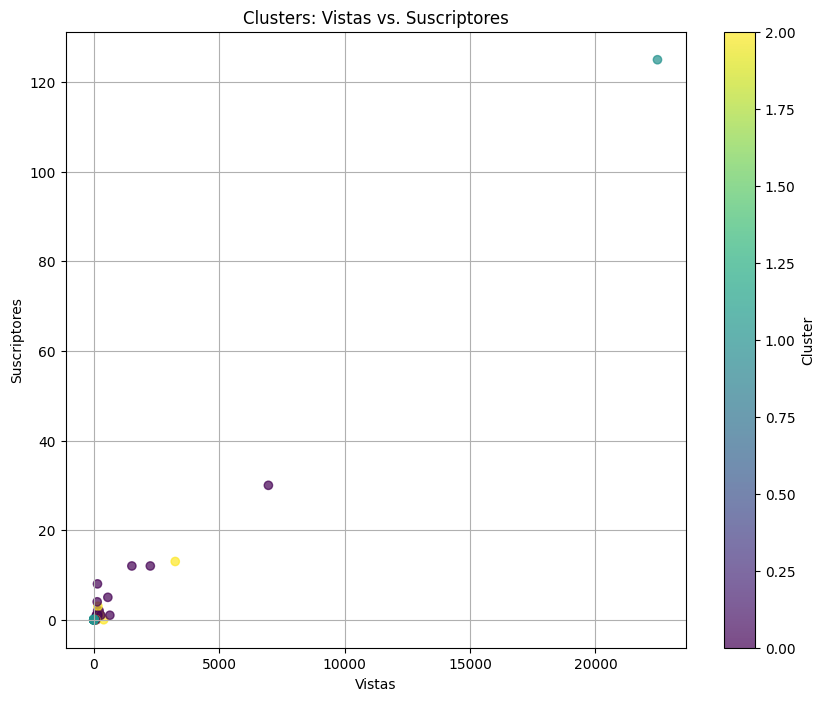

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(clustering_data['Vistas'], clustering_data['Suscriptores'], c=clustering_data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters: Vistas vs. Suscriptores')
plt.xlabel('Vistas')
plt.ylabel('Suscriptores')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()



#**Resultados**
El an√°lisis agrup√≥ los videos en tres clusters con caracter√≠sticas distintas:

*   Cluster 0 (Rendimiento Promedio): Videos con buen desempe√±o general en vistas (893) y suscriptores (5.33), acompa√±ados de alta tasa de clics (3.94%) y duraci√≥n moderada de vistas (68 segundos). Representan un est√°ndar funcional para el canal.

*   Cluster 1 (Rendimiento Bajo): Videos con m√©tricas bajas en tasa de clics (0.11%) y duraci√≥n promedio de vistas (2.7 segundos), pero un caso at√≠pico alcanz√≥ 7,000 vistas, destacando la importancia de analizar factores espec√≠ficos de √©xito.

*   Cluster 2 (Alta Retenci√≥n): Videos con menor n√∫mero de vistas (729) pero alta retenci√≥n (111 segundos) y buena calidad de audio e imagen, lo que indica una conexi√≥n efectiva con la audiencia.

##Observaciones

El Cluster 1 requiere optimizaci√≥n en miniaturas y t√≠tulos, mientras que el Cluster 2 demuestra la importancia de la calidad para la retenci√≥n. El caso at√≠pico del Cluster 1 puede proporcionar aprendizajes clave para replicar su √©xito en otros videos.

# **10. Otros an√°lisis**

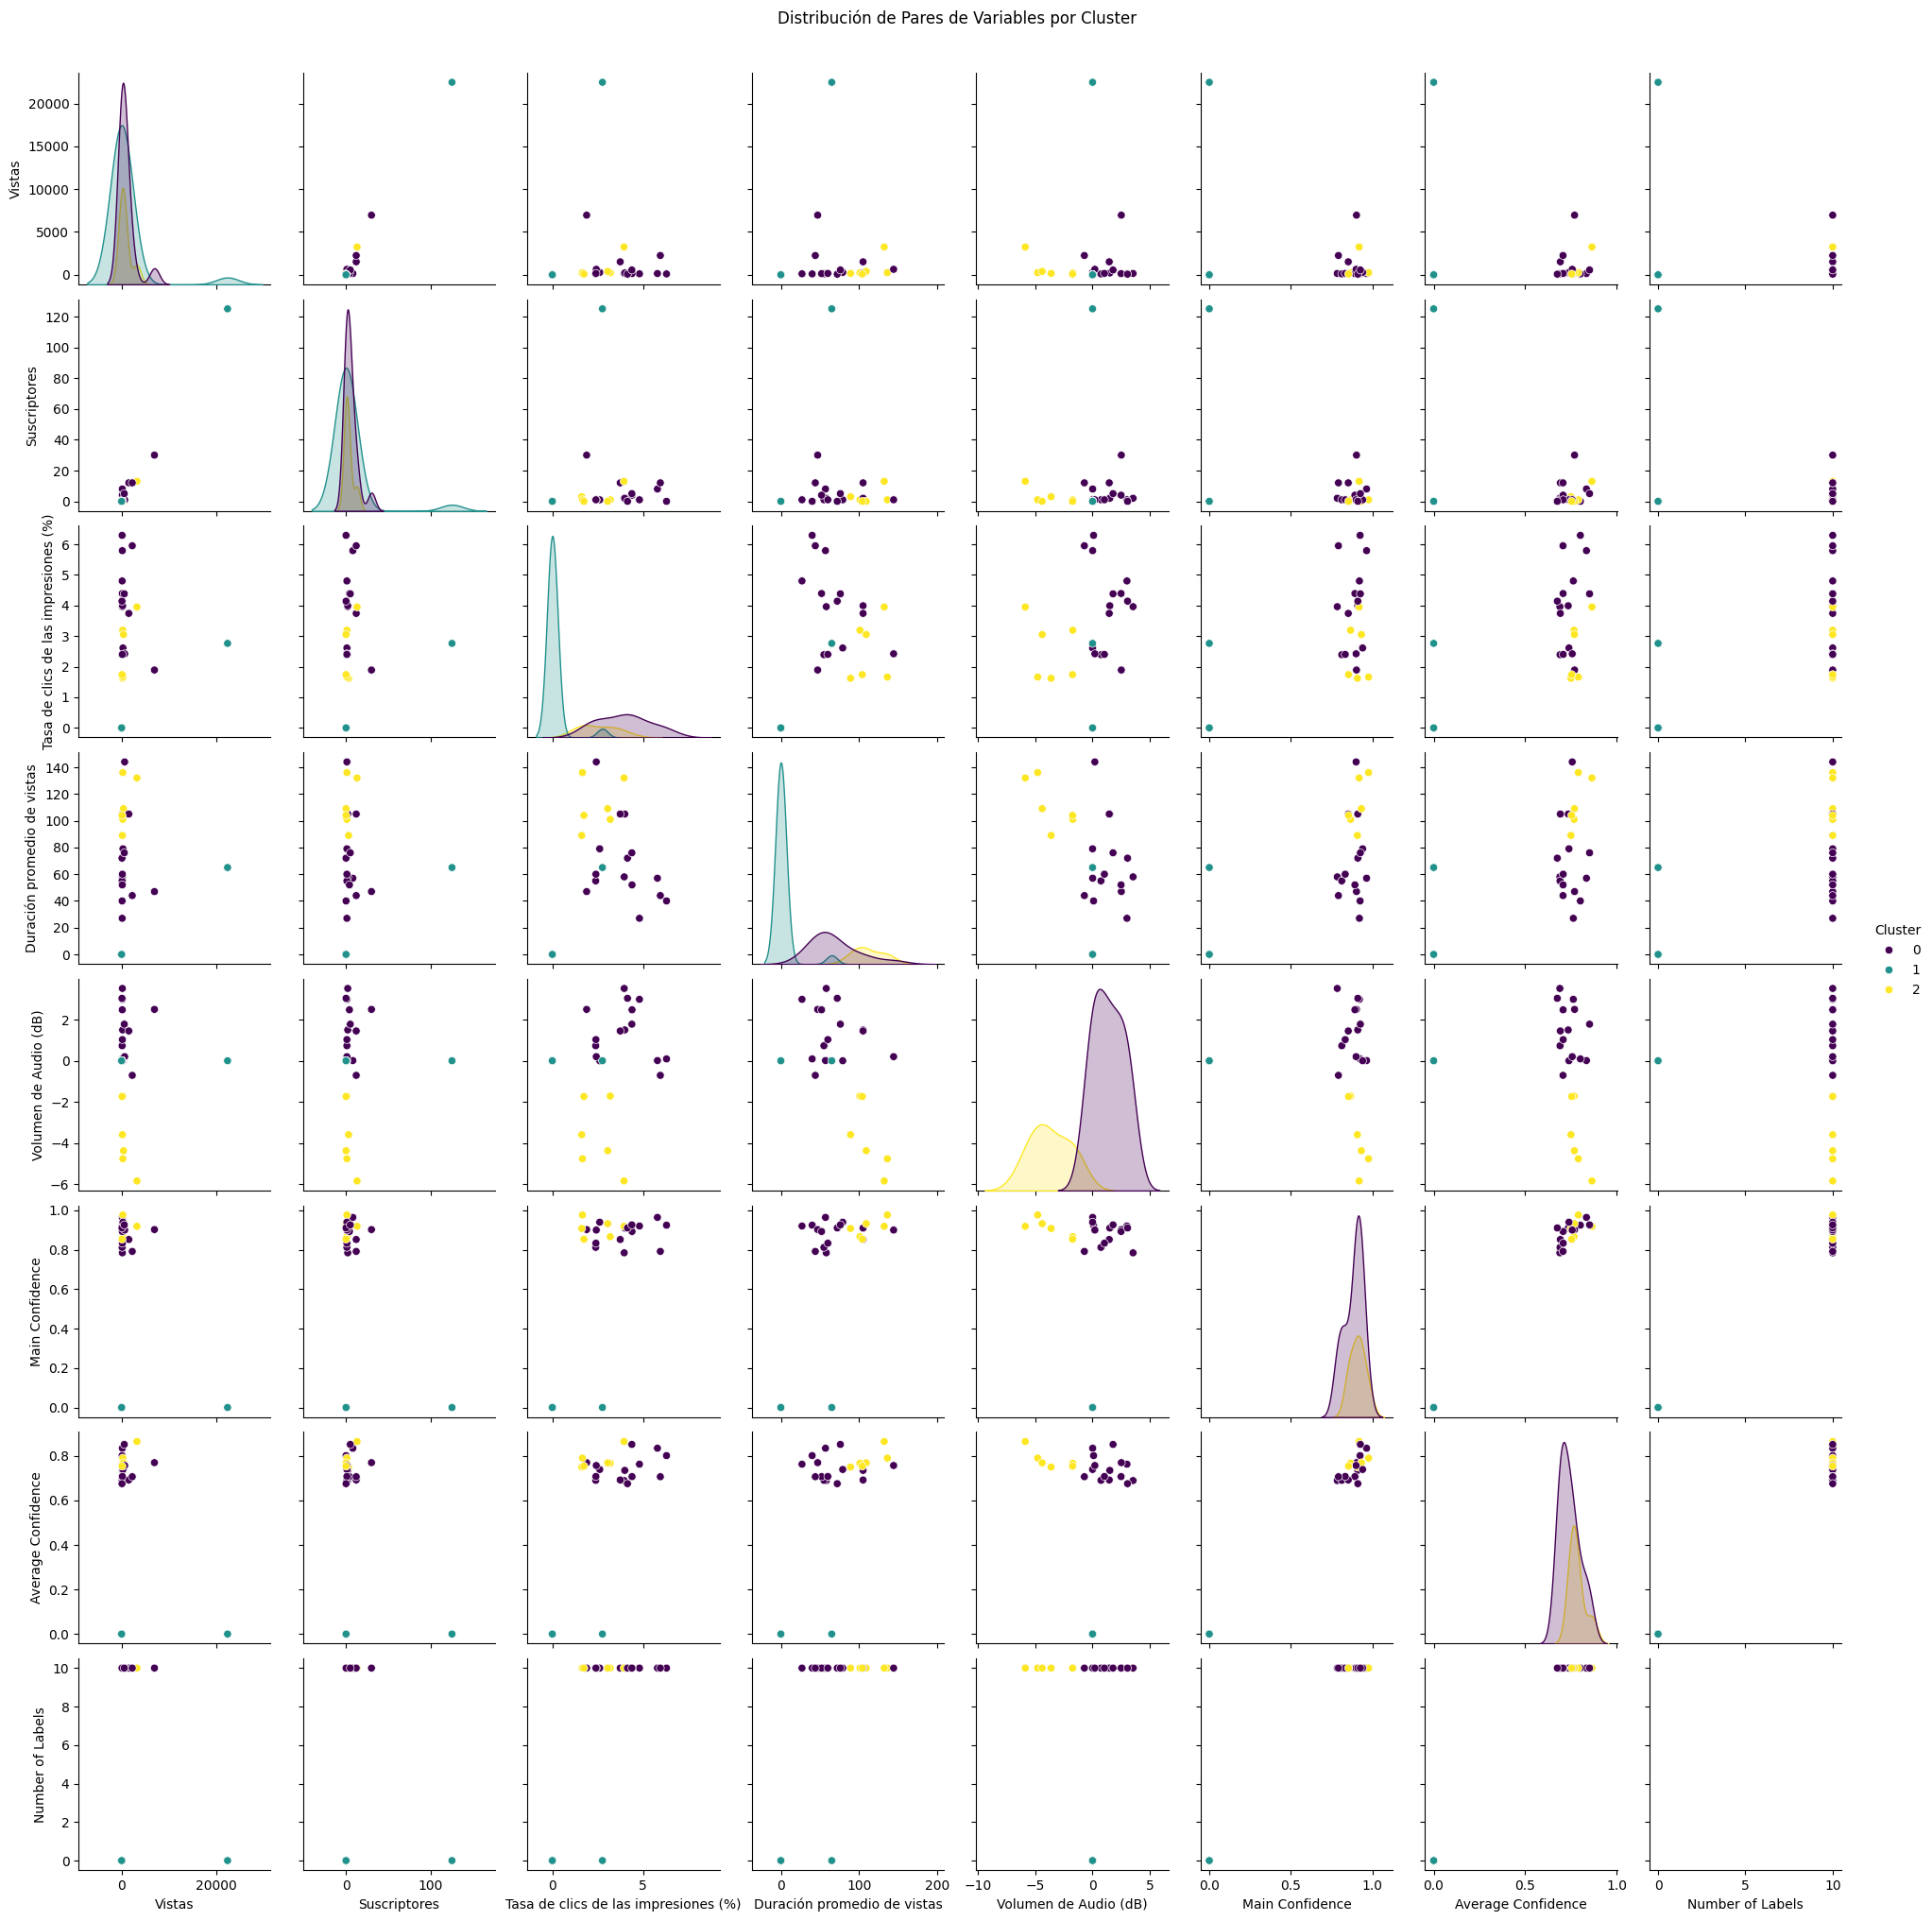

In [ ]:
# Generar un gr√°fico de pares para visualizar la distribuci√≥n de las variables por cluster
sns.pairplot(clustering_data, hue="Cluster", diag_kind="kde", palette="viridis")

# A√±adir un t√≠tulo al gr√°fico
plt.suptitle('Distribuci√≥n de Pares de Variables por Cluster', y=1.02)

# Mostrar el gr√°fico
plt.show()


 *Incluye m√∫ltiples visualizaciones que muestran c√≥mo las variables clave como vistas, suscriptores, duraci√≥n promedio y calidad de audio se distribuyen y se relacionan dentro de cada cluster. A trav√©s de estos gr√°ficos:*

*   Cluster 0: Los gr√°ficos indican que este grupo representa videos con un rendimiento promedio en vistas y suscriptores, con m√©tricas consistentes de retenci√≥n y calidad.

*   Cluster 1: Los gr√°ficos de baja densidad y dispersi√≥n reflejan videos con bajo rendimiento general, destacando √°reas cr√≠ticas de mejora.

*   Cluster 2: Se observa que los videos de este cluster tienen alta retenci√≥n (duraci√≥n promedio) y consistencia en calidad, pero menor impacto en vistas y suscriptores.

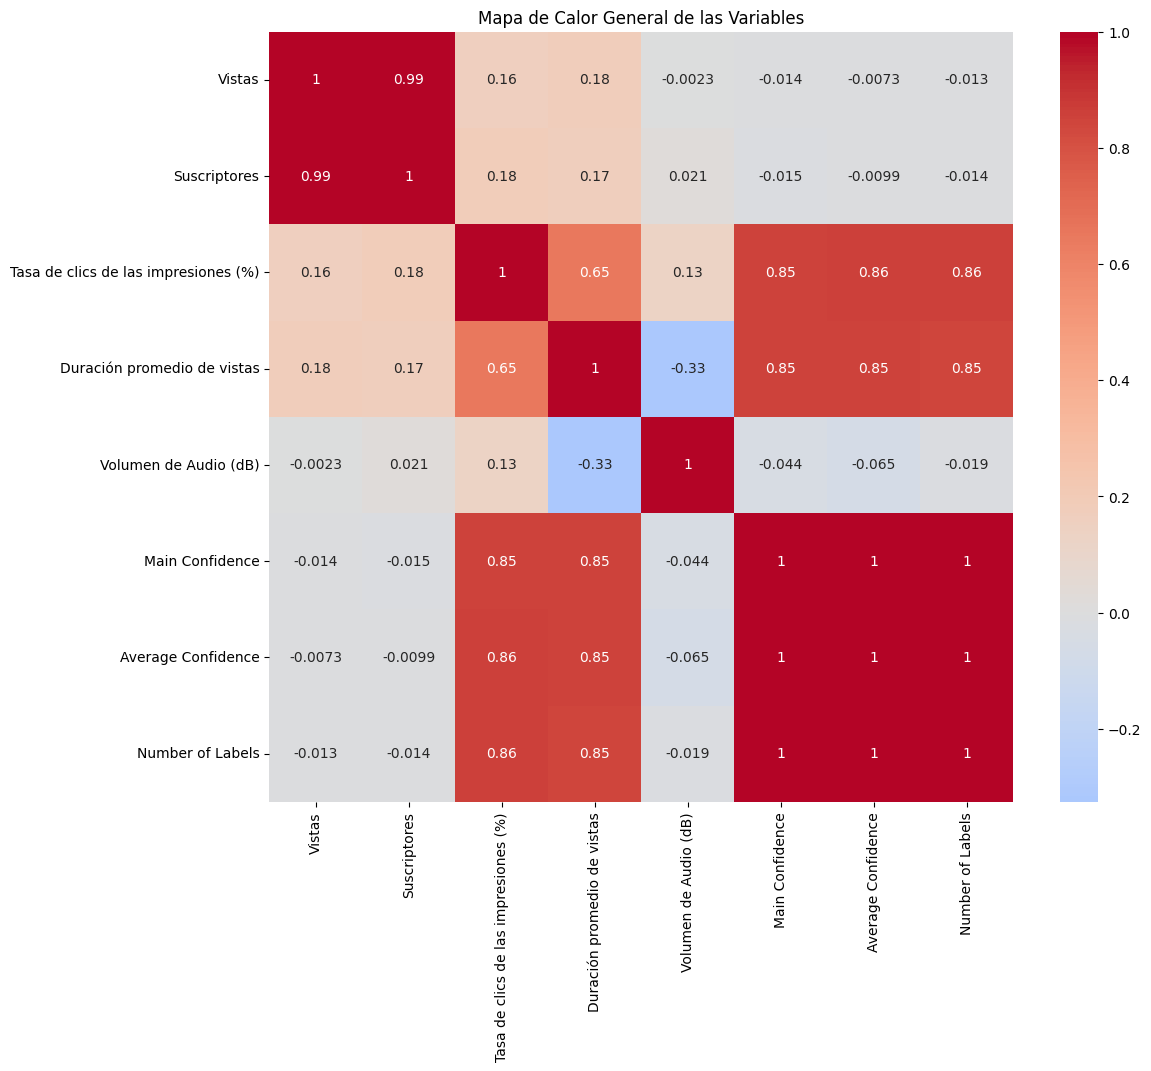

In [ ]:
# Crear un mapa de calor general con todas las variables
plt.figure(figsize=(12, 10))
sns.heatmap(clustering_data.drop(columns='Cluster').corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de Calor General de las Variables")
plt.show()


1.   Vistas y Suscriptores est√°n fuertemente correlacionadas (0.99), confirmando que m√°s vistas generan m√°s suscriptores. Esto refuerza la necesidad de optimizar el contenido para maximizar el alcance.

2.   Tasa de clics de las impresiones (%) muestra una correlaci√≥n positiva con la Duraci√≥n promedio de vistas (0.65), lo que sugiere que videos m√°s atractivos y bien estructurados retienen mejor a los espectadores.

3.   Miniaturas (Main Confidence y Average Confidence) est√°n altamente correlacionadas con la Tasa de clics y la Duraci√≥n promedio, subrayando la importancia de miniaturas bien dise√±adas para captar atenci√≥n.

4.   Volumen de Audio tiene una ligera relaci√≥n negativa (-0.33) con la Duraci√≥n promedio de vistas, indicando que niveles extremos de audio podr√≠an ser perjudiciales.

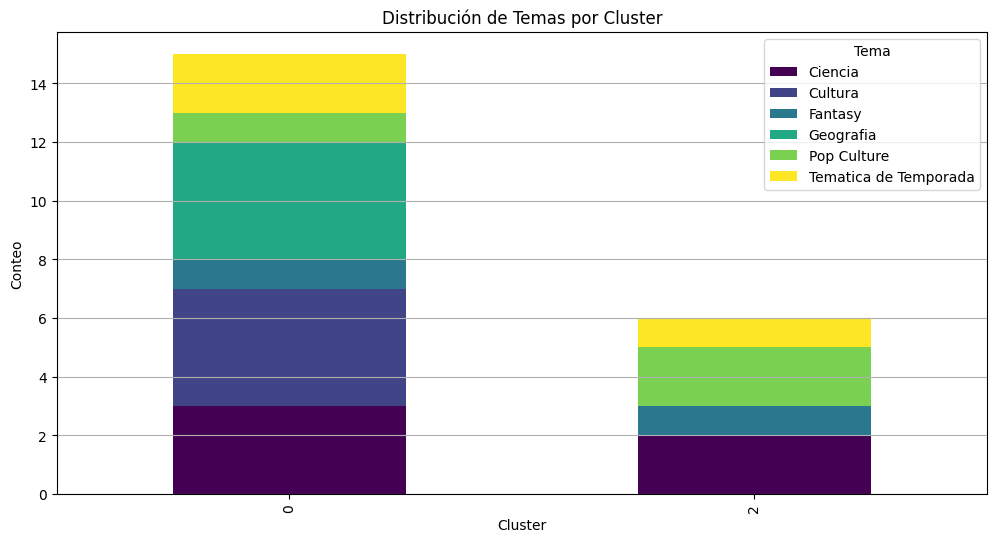

In [ ]:
# Agrupar los datos por Cluster y Tema, y contar la cantidad de ocurrencias de cada tema en cada cluster
cluster_category = contenido.groupby(['Cluster', 'Tema']).size().unstack()

# Crear un gr√°fico de barras apiladas para visualizar la distribuci√≥n de temas por cluster
cluster_category.plot(
    kind='bar',
    stacked=True,  # Las barras ser√°n apiladas para mostrar el total por cluster
    figsize=(12, 6),  # Tama√±o del gr√°fico
    colormap='viridis'  # Esquema de colores
)

# A√±adir t√≠tulo y etiquetas al gr√°fico
plt.title('Distribuci√≥n de Temas por Cluster')  # T√≠tulo del gr√°fico
plt.ylabel('Conteo')  # Etiqueta del eje Y
plt.xlabel('Cluster')  # Etiqueta del eje X

# A√±adir l√≠neas de referencia en el eje Y para facilitar la interpretaci√≥n
plt.grid(axis='y')

# Mostrar el gr√°fico
plt.show()


# An√°lisis de la Eficiencia Visual de Miniaturas con Google Vision API

*Se utiliza la API de Google Cloud Vision para realizar un an√°lisis automatizado de las im√°genes en una carpeta espec√≠fica. Primero, configura las credenciales necesarias para autenticar el cliente de Vision. Luego, para cada imagen en la carpeta, extrae etiquetas principales, texto detectado mediante OCR (Reconocimiento √ìptico de Caracteres) y colores dominantes. El an√°lisis incluye la descripci√≥n de la etiqueta principal, su nivel de confianza, el promedio de confianza entre todas las etiquetas y los colores en formato RGB. Los resultados de todas las im√°genes procesadas se guardan en un archivo CSV con detalles como el nombre de la imagen, la etiqueta principal, la confianza promedio, el texto detectado y los colores dominantes*

In [ ]:
!pip install google-cloud-vision
import os
import io
import csv
from google.cloud import vision

# Configurar las credenciales
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/the-quiz-challenge-82427578332e.json"

# Configurar el cliente de Vision
client = vision.ImageAnnotatorClient()

# Ruta de la carpeta de im√°genes
image_folder = "/content/Miniaturas"

# CSV para guardar los resultados
output_csv = "/content/image_analysis.csv"

# Funci√≥n para analizar una imagen
def analyze_image(image_path):
    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)

    # An√°lisis de etiquetas
    label_response = client.label_detection(image=image)
    labels = label_response.label_annotations
    label_data = [(label.description, label.score) for label in labels]
    main_label = label_data[0][0] if label_data else "N/A"
    main_confidence = label_data[0][1] if label_data else 0
    avg_confidence = sum([score for _, score in label_data]) / len(label_data) if label_data else 0

    # An√°lisis de texto (OCR)
    text_response = client.text_detection(image=image)
    detected_text = " ".join([text.description for text in text_response.text_annotations]) if text_response.text_annotations else "N/A"

    # An√°lisis de colores dominantes
    color_response = client.image_properties(image=image)
    dominant_colors = [f"RGB({int(c.color.red)}, {int(c.color.green)}, {int(c.color.blue)})" for c in color_response.image_properties_annotation.dominant_colors.colors] if color_response.image_properties_annotation else []

    return {
        "Image Name": os.path.basename(image_path),
        "Main Label": main_label,
        "Main Confidence": main_confidence,
        "Average Confidence": avg_confidence,
        "Number of Labels": len(label_data),
        "Detected Text": detected_text,
        "Dominant Colors": ", ".join(dominant_colors)
    }

# Procesar todas las im√°genes y guardar en CSV
with open(output_csv, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=[
        "Image Name", "Main Label", "Main Confidence",
        "Average Confidence", "Number of Labels",
        "Detected Text", "Dominant Colors"
    ])
    writer.writeheader()
    for image_name in os.listdir(image_folder):
        if image_name.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, image_name)
            data = analyze_image(image_path)
            writer.writerow(data)

print(f"An√°lisis completado. Resultados guardados en {output_csv}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Miniaturas'

## Extracci√≥n de IDs de Videos Usando YouTube Data API V3

*Utiliza la API de YouTube Data para extraer los IDs de los videos de un canal espec√≠fico. Primero, se carga la API Key desde un archivo de texto para autenticarse. Luego, se conecta a la API de YouTube para obtener el ID de la lista de reproducci√≥n de subidas (uploads playlist) asociada al canal indicado. A partir de esta lista, se extraen los IDs de los videos en lotes de hasta 50 videos por solicitud, navegando por todas las p√°ginas de resultados mediante tokens de paginaci√≥n. Los IDs de los videos recopilados se guardan en un archivo CSV con un encabezado para su posterior uso o an√°lisis.*

In [ ]:
!pip install google-api-python-client

from googleapiclient.discovery import build
import csv

# Cargar API Key desde un archivo de texto
with open('/content/API YT.txt', 'r') as file:
    API_KEY = file.read().strip()

CHANNEL_ID = 'UC30vRBFka6oZMaZ7Gyu3rRA'  # Reemplaza con el ID del canal

def get_channel_video_ids(api_key, channel_id):
    youtube = build('youtube', 'v3', developerKey=api_key)
    video_ids = []

    # Obtener los uploads playlist ID
    response = youtube.channels().list(part='contentDetails', id=channel_id).execute()
    uploads_playlist_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads']

    # Obtener los videos de la playlist
    next_page_token = None
    while True:
        playlist_response = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=uploads_playlist_id,
            maxResults=50,
            pageToken=next_page_token
        ).execute()

        for item in playlist_response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = playlist_response.get('nextPageToken')
        if not next_page_token:
            break

    return video_ids

def save_to_csv(video_ids, output_path):
    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Video ID"])  # Escribir encabezado
        for video_id in video_ids:
            writer.writerow([video_id])
    print(f"Los IDs se guardaron correctamente en {output_path}")

# Ejecutar la funci√≥n
video_ids = get_channel_video_ids(API_KEY, CHANNEL_ID)

# Guardar en CSV
output_csv_path = "youtube_video_ids.csv"  # Ruta del archivo CSV
save_to_csv(video_ids, output_csv_path)


Los IDs se guardaron correctamente en youtube_video_ids.csv


# 11. **Conclusi√≥n y Recomendaciones para The Quiz Challenge**

## **An√°lisis de Clusters y Resultados**

### **Cluster 0: Videos de Rendimiento Moderado**
- **Promedio de vistas:** 893
- **Tasa de clics:** 3.94%
- **Duraci√≥n promedio de vistas:** 68 segundos
- **Ejemplos de Videos:**
  - Quizzes generales como **"Trivia de Geograf√≠a"** o **"Datos curiosos sobre la ciencia"**.
  - Temas de inter√©s medio que atraen audiencia, pero no necesariamente mantienen una alta retenci√≥n.
- **Caracter√≠sticas principales:**
  - Rendimiento estable, pero sin alcanzar un gran impacto en suscriptores.
  - Buen punto de partida para estrategias de optimizaci√≥n.

---

### **Cluster 1: Videos de Bajo Rendimiento y Comportamiento An√≥malo**
- **Promedio de vistas:** 936
- **Tasa de clics:** 0.11%
- **Duraci√≥n promedio de vistas:** 2.7 segundos
- **Ejemplos de Videos:**
  - Videos con t√≠tulos poco claros o miniaturas poco llamativas, como **"¬øSabes sobre animales extra√±os?"**.
  - Tem√°ticas de nicho con bajo inter√©s o videos con problemas t√©cnicos.
- **Anomal√≠a Detectada:**
  - Dentro de este grupo, un video alcanz√≥ **7,000 vistas**, posicion√°ndose cerca de los resultados del Cluster 2.
  - Este caso sugiere que, con las mejoras adecuadas, estos videos tienen potencial de √©xito.
- **Caracter√≠sticas principales:**
  - Problemas en elementos clave como miniaturas, t√≠tulos o el contenido inicial del video.

---

### **Cluster 2: Videos de Alta Interacci√≥n**
- **Promedio de vistas:** 729
- **Tasa de clics:** 2.53%
- **Duraci√≥n promedio de vistas:** 112 segundos
- **Ejemplos de Videos:**
  - Quizzes interactivos y espec√≠ficos como **"Test sobre el ciclo del agua"** o **"Trivia de Harry Potter"**.
  - Videos de tem√°ticas populares y con contenido entretenido y bien dise√±ado.
- **Caracter√≠sticas principales:**
  - Alto nivel de retenci√≥n y engagement.
  - Estos videos son ideales para atraer suscriptores y sirven como referencia para generar m√°s contenido exitoso.

---

## **Recomendaciones para Incrementar Vistas y Monetizaci√≥n**

### **1. Aprovechar el Caso de las 7,000 Vistas**
- **Ejemplo relevante:** Revisar el contenido, t√≠tulo y miniatura del video destacado en el Cluster 1.
- **Acci√≥n:** Replicar estrategias como t√≠tulos llamativos y tem√°ticas similares en videos de bajo rendimiento.

---

### **2. Mejorar el Desempe√±o del Cluster 1**
- **Estrategias:**
  - Redise√±ar miniaturas con colores vibrantes y textos claros.
  - Ajustar t√≠tulos para generar curiosidad, como **"10 preguntas imposibles sobre animales"**.
  - Optimizar los primeros **10 segundos** del contenido para enganchar a la audiencia.
- **Objetivo:** Incrementar la tasa de clics y retenci√≥n inicial.

---

### **3. Fortalecer Videos del Cluster 2**
- **Ejemplo relevante:** Videos de alta interacci√≥n como **"Trivia de Harry Potter"** son ideales para promoci√≥n cruzada.
- **Acci√≥n:** Crear m√°s contenido basado en tem√°ticas populares con m√©tricas positivas.

---

### **4. Incentivar la Suscripci√≥n**
- Incluir llamados a la acci√≥n (CTAs) en videos de alta retenci√≥n, como **"¬øTe gust√≥ este quiz? Suscr√≠bete para m√°s!"**.
- Promocionar los mejores videos en redes sociales y playlists destacadas.

---

### **5. Monitoreo y Ajuste Continuo**
- Utilizar un dashboard interactivo para rastrear m√©tricas clave como vistas, clics y retenci√≥n.
- Reevaluar la estrategia cada mes para mantener el crecimiento y optimizar contenido futuro.

---

## **Veredicto**

El an√°lisis demuestra que la monetizaci√≥n de **The Quiz Challenge** depende de:
1. **Rescatar videos de bajo rendimiento (Cluster 1)** ajustando elementos visuales y tem√°ticos.
2. **Replicar el √©xito del Cluster 2** enfoc√°ndose en videos de alta interacci√≥n y retenci√≥n.
3. **Aprovechar ejemplos exitosos (7,000 vistas)** para guiar estrategias futuras.

Con estos ajustes, el canal podr√° aumentar las vistas y alcanzar los requisitos necesarios para la monetizaci√≥n.
